Repeat Data_Wrangling process on all NE counties

# Data wrangling: pollution in one state
Plan to explore a single state and then venture out to work on regions
# Importing libraries

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [151]:
MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD  = [25, 9, 23, 36, 33, 34, 42, 50, 10 , 24]
NORTH_EAST = [MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD]

daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')


def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

# Explore and clean aqi by county dataset

In [152]:
# work with one state NE 2019

print(daily_aqi_by_county_2019.columns)

NE_States = (daily_aqi_by_county_2019['State Code'] == MA) | \
            (daily_aqi_by_county_2019['State Code'] == CT) | \
            (daily_aqi_by_county_2019['State Code'] == ME) | \
            (daily_aqi_by_county_2019['State Code'] == NY) | \
            (daily_aqi_by_county_2019['State Code'] == NH) | \
            (daily_aqi_by_county_2019['State Code'] == NJ) | \
            (daily_aqi_by_county_2019['State Code'] == PA) | \
            (daily_aqi_by_county_2019['State Code'] == VT) | \
            (daily_aqi_by_county_2019['State Code'] == DE) | \
            (daily_aqi_by_county_2019['State Code'] == MD)
NE_aqi_2019 = daily_aqi_by_county_2019.loc[NE_States]
display(NE_aqi_2019)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
42469,Connecticut,Fairfield,9,1,2019-01-01,20,Good,PM2.5,09-001-1123,3
42470,Connecticut,Fairfield,9,1,2019-01-02,31,Good,PM2.5,09-001-1123,3
42471,Connecticut,Fairfield,9,1,2019-01-03,38,Good,PM2.5,09-001-1123,3
42472,Connecticut,Fairfield,9,1,2019-01-04,55,Moderate,PM2.5,09-001-0010,3
42473,Connecticut,Fairfield,9,1,2019-01-05,52,Moderate,PM2.5,09-001-1123,3
...,...,...,...,...,...,...,...,...,...,...
301885,Vermont,Windham,50,25,2019-12-14,0,Good,PM2.5,50-025-9000,1
301886,Vermont,Windham,50,25,2019-12-17,3,Good,PM2.5,50-025-9000,1
301887,Vermont,Windham,50,25,2019-12-20,5,Good,PM2.5,50-025-9000,1
301888,Vermont,Windham,50,25,2019-12-23,18,Good,PM2.5,50-025-9000,1


         State Code   County Code           AQI  Number of Sites Reporting
count  51802.000000  51802.000000  51802.000000               51802.000000
mean      32.595421     41.624628     37.703699                   1.735937
std        9.606114     53.134158     15.748965                   1.259108
min        9.000000      1.000000      0.000000                   1.000000
25%       25.000000     11.000000     30.000000                   1.000000
50%       36.000000     25.000000     37.000000                   1.000000
75%       42.000000     63.000000     44.000000                   2.000000
max       50.000000    510.000000    174.000000                  13.000000
State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64


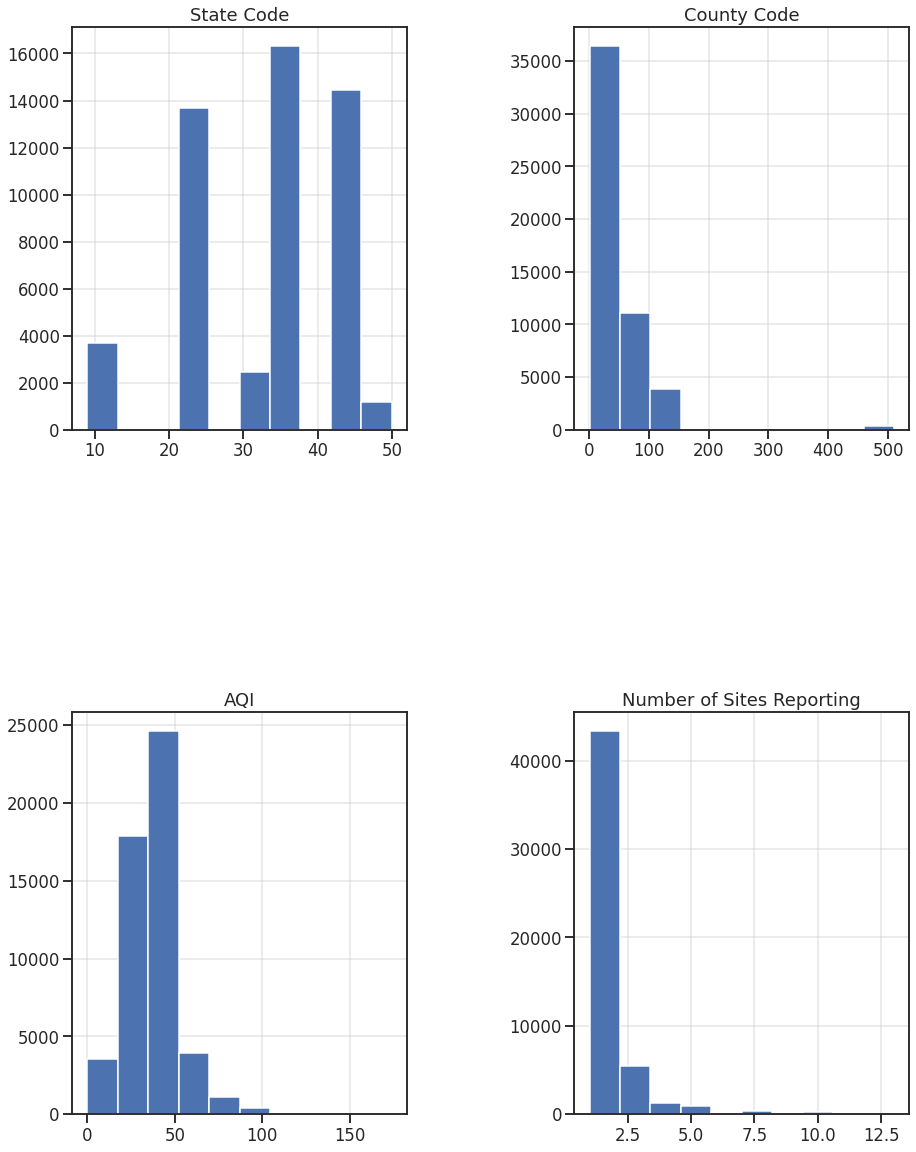

In [153]:
# klib.dist_plot(NE_aqi_2019)

print(NE_aqi_2019.describe())
print(NE_aqi_2019.isna().sum())
NE_aqi_2019.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

* important points to note in distributions are there are some moderate AQIs data points
* Not sure how important number of sites reporting is to analyze
* also no missing values

<BarContainer object of 51802 artists>

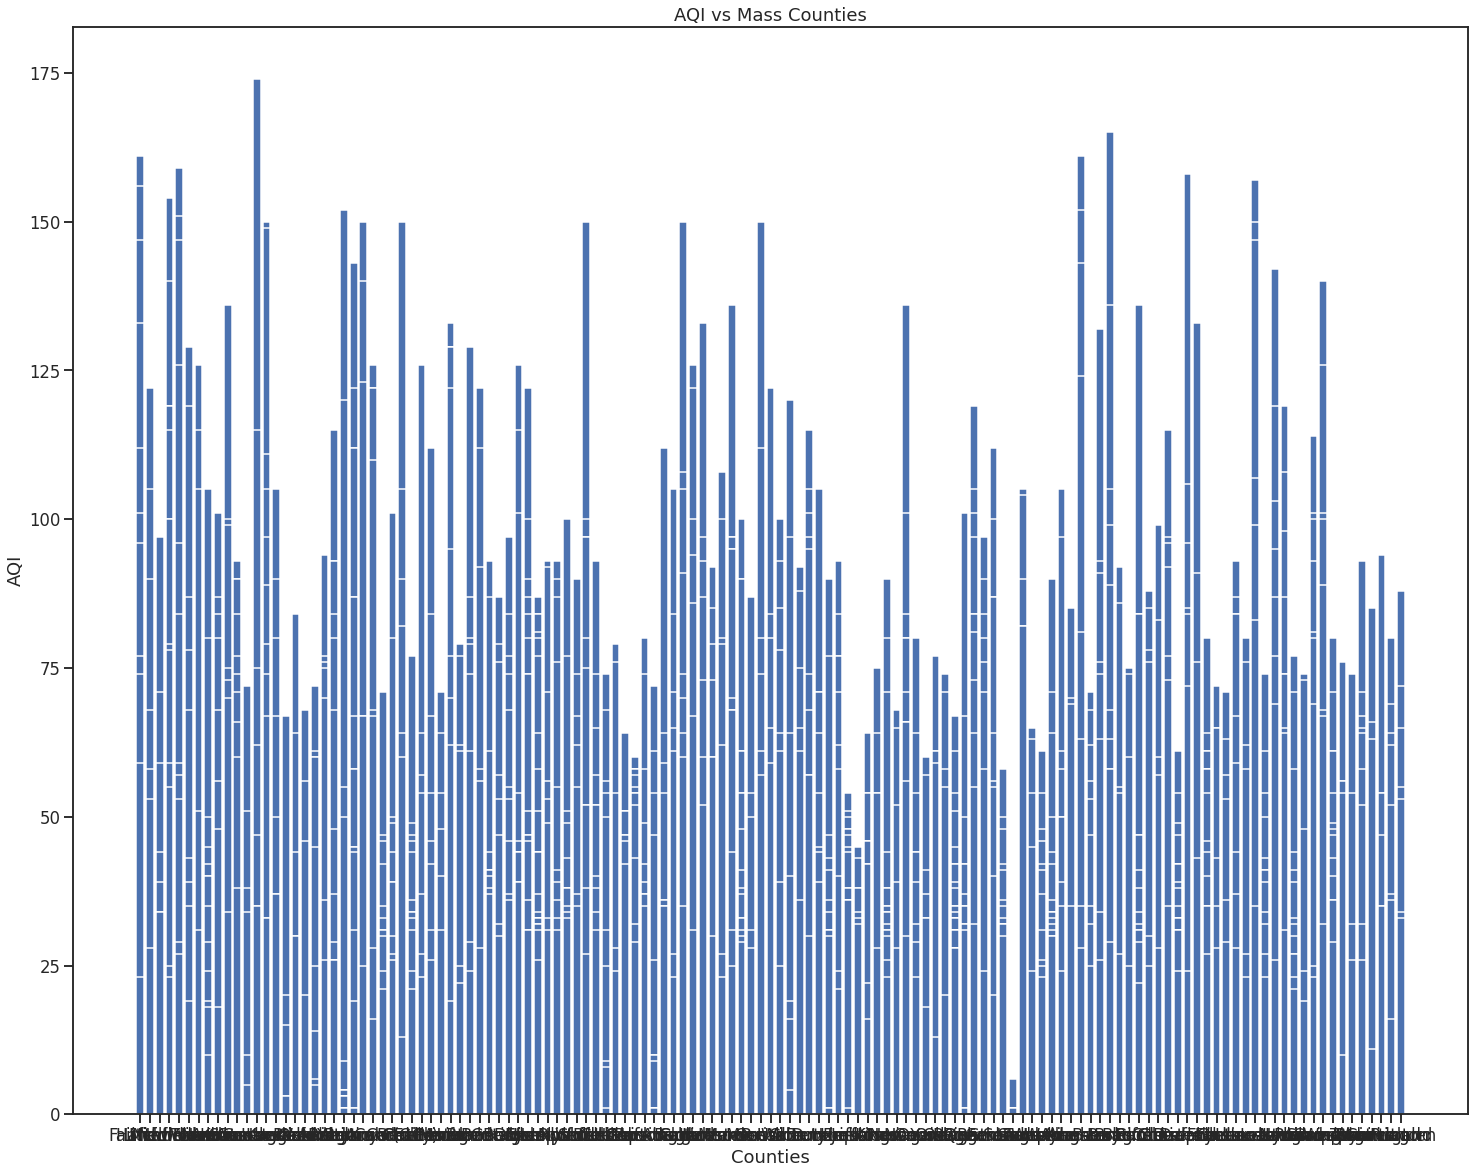

In [154]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(NE_aqi_2019['county Name'], NE_aqi_2019['AQI'])

* 51802 rows
* values above 150 and one value below 10 seems to be outliers
* these two values are outliers
* But there are no negative values which is good

In [155]:
above_150_aqi = NE_aqi_2019.AQI > 150
display(NE_aqi_2019.loc[above_150_aqi])
below_10_aqi = NE_aqi_2019.AQI < 10
display(NE_aqi_2019.loc[below_10_aqi])
print(NE_aqi_2019.shape)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
42653,Connecticut,Fairfield,9,1,2019-07-04,151,Unhealthy,Ozone,09-001-0017,5
42665,Connecticut,Fairfield,9,1,2019-07-16,161,Unhealthy,Ozone,09-001-9003,5
42678,Connecticut,Fairfield,9,1,2019-07-29,156,Unhealthy,Ozone,09-001-9003,5
43693,Connecticut,Middlesex,9,7,2019-07-16,154,Unhealthy,Ozone,09-007-9007,1
43965,Connecticut,New Haven,9,9,2019-07-16,159,Unhealthy,Ozone,09-009-0027,3
43978,Connecticut,New Haven,9,9,2019-07-29,151,Unhealthy,Ozone,09-009-9002,3
125459,Maine,Aroostook,23,3,2019-05-26,174,Unhealthy,PM2.5,23-003-0014,4
128379,Maryland,Allegany,24,1,2019-04-17,152,Unhealthy,SO2,24-001-8882,2
244367,Pennsylvania,Allegheny,42,3,2019-02-02,158,Unhealthy,PM2.5,42-003-0064,13
244368,Pennsylvania,Allegheny,42,3,2019-02-03,161,Unhealthy,PM2.5,42-003-0064,10


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
42758,Connecticut,Fairfield,9,1,2019-10-17,6,Good,PM10,09-001-0010,2
42800,Connecticut,Fairfield,9,1,2019-11-28,7,Good,PM2.5,09-001-0010,3
44410,Connecticut,New London,9,11,2019-10-04,9,Good,PM2.5,09-011-0124,1
44423,Connecticut,New London,9,11,2019-10-17,8,Good,PM2.5,09-011-0124,1
44424,Connecticut,New London,9,11,2019-10-18,7,Good,PM2.5,09-011-0124,1
...,...,...,...,...,...,...,...,...,...,...
301883,Vermont,Windham,50,25,2019-12-08,5,Good,PM2.5,50-025-9000,1
301884,Vermont,Windham,50,25,2019-12-11,6,Good,PM2.5,50-025-9000,1
301885,Vermont,Windham,50,25,2019-12-14,0,Good,PM2.5,50-025-9000,1
301886,Vermont,Windham,50,25,2019-12-17,3,Good,PM2.5,50-025-9000,1


(51802, 10)


* Appears to be no high outliers
* Appear to have some coutnies with very low aqi


<BarContainer object of 131 artists>

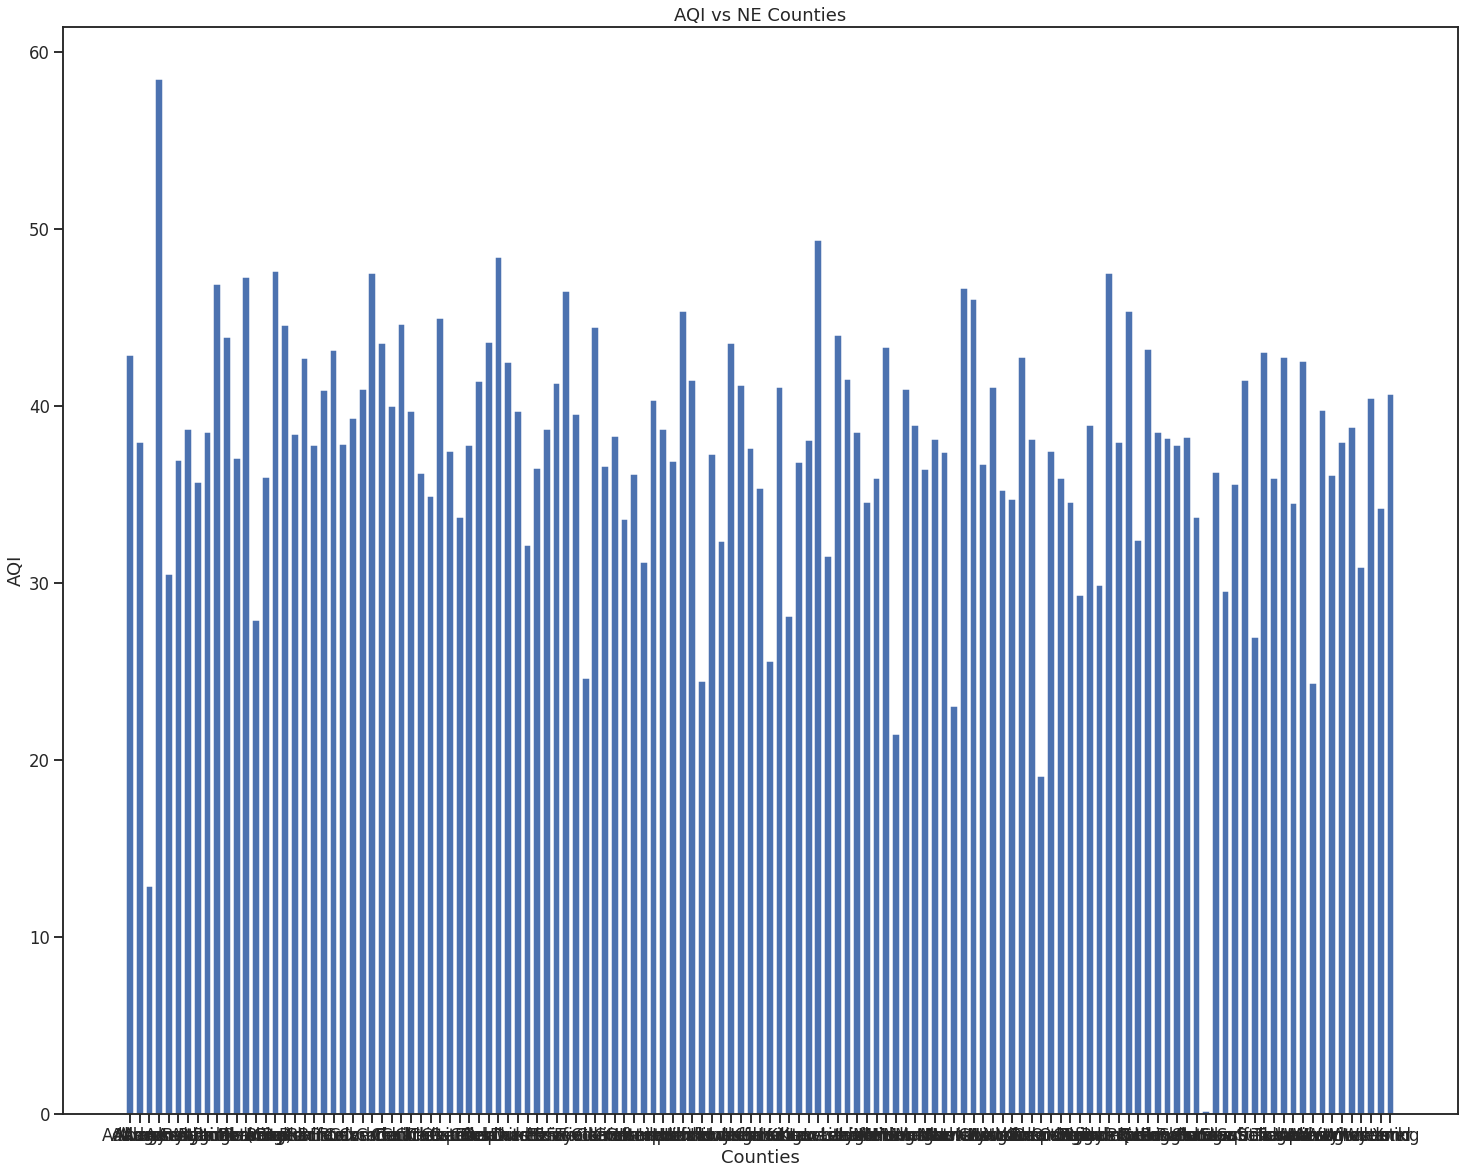

In [156]:
# bar plot of average aqi by county

mean_NE_AQI = NE_aqi_2019.groupby('county Name')[['AQI']].mean()
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs NE Counties')
plt.bar(mean_NE_AQI.index, mean_NE_AQI['AQI'])

When averaging, we get a remainder of 131 row data


In [157]:
above_50_aqi = mean_NE_AQI.AQI > 50
display(mean_NE_AQI.loc[above_50_aqi])
below_10_aqi = mean_NE_AQI.AQI < 10
display(mean_NE_AQI.loc[below_10_aqi])

,AQI
county Name,
Allegheny,58.50137


,AQI
county Name,
Seneca,0.172222


* Seneca appears to be an outlier county with near 0 average aqi
* Allegheny higher than average but does not appear to much of outlier


In [158]:
max = NE_aqi_2019.AQI == NE_aqi_2019.AQI.max()
min = NE_aqi_2019.AQI == NE_aqi_2019.AQI.min()
display(NE_aqi_2019.loc[max | min])

# check what are the defining parameters
NE_aqi_2019['Defining Parameter'].unique()
display(NE_aqi_2019.loc[NE_aqi_2019['county Name'] == 'Seneca'])

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
125459,Maine,Aroostook,23,3,2019-05-26,174,Unhealthy,PM2.5,23-003-0014,4
127022,Maine,Oxford,23,17,2019-02-09,0,Good,PM2.5,23-017-2011,1
127023,Maine,Oxford,23,17,2019-02-10,0,Good,PM2.5,23-017-2011,1
127058,Maine,Oxford,23,17,2019-03-17,0,Good,PM2.5,23-017-2011,1
127647,Maine,Penobscot,23,19,2019-11-30,0,Good,PM2.5,23-019-0017,1
...,...,...,...,...,...,...,...,...,...,...
257222,Pennsylvania,Warren,42,123,2019-09-30,0,Good,SO2,42-123-0005,2
257228,Pennsylvania,Warren,42,123,2019-10-06,0,Good,SO2,42-123-0005,2
257244,Pennsylvania,Warren,42,123,2019-10-22,0,Good,SO2,42-123-0005,2
257284,Pennsylvania,Warren,42,123,2019-12-01,0,Good,SO2,42-123-0005,2


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
197059,New York,Seneca,36,99,2019-01-01,0,Good,SO2,36-099-0002,1
197060,New York,Seneca,36,99,2019-01-02,0,Good,SO2,36-099-0002,1
197061,New York,Seneca,36,99,2019-01-03,0,Good,SO2,36-099-0002,1
197062,New York,Seneca,36,99,2019-01-04,0,Good,SO2,36-099-0002,1
197063,New York,Seneca,36,99,2019-01-05,0,Good,SO2,36-099-0002,1
...,...,...,...,...,...,...,...,...,...,...
197414,New York,Seneca,36,99,2019-12-27,0,Good,SO2,36-099-0002,1
197415,New York,Seneca,36,99,2019-12-28,0,Good,SO2,36-099-0002,1
197416,New York,Seneca,36,99,2019-12-29,0,Good,SO2,36-099-0002,1
197417,New York,Seneca,36,99,2019-12-30,0,Good,SO2,36-099-0002,1


* Seneca has 320 columns of 0 aqi with defining parameter, sulfur dioxide
* maybe track a particular pollutant

# Wii not explore income as deem income does not influence AQI from previous wrangling


# Explore and clean demographic data set 2019

In [159]:
print(county_demographic.columns)
print(county_demographic.dtypes)
# seems demographic is all numeric type which is good

print(county_demographic.shape)
# we have 80 columns

display(county_demographic.head())
print(county_demographic.SUMLEV.unique())

NE_counties = (county_demographic.STATE == MA) | \
              (county_demographic.STATE == CT) | \
              (county_demographic.STATE == ME) | \
              (county_demographic.STATE == NY) | \
              (county_demographic.STATE == NH) | \
              (county_demographic.STATE == NJ) | \
              (county_demographic.STATE == PA) | \
              (county_demographic.STATE == VT) | \
              (county_demographic.STATE == DE) | \
              (county_demographic.STATE == MD)
NE_dems = county_demographic.loc[NE_counties]

display(NE_dems)

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
70224,50,9,1,Connecticut,Fairfield County,1,0,916829,445601,471228,...,70171,67235,7428,7882,2393,2100,915,830,527,403
70225,50,9,1,Connecticut,Fairfield County,1,1,56899,29226,27673,...,6110,5833,994,931,234,192,124,93,45,31
70226,50,9,1,Connecticut,Fairfield County,1,2,62907,32165,30742,...,5742,5281,839,817,199,188,101,77,25,32
70227,50,9,1,Connecticut,Fairfield County,1,3,66606,34212,32394,...,5539,5384,739,804,171,169,88,94,47,43
70228,50,9,1,Connecticut,Fairfield County,1,4,62192,31816,30376,...,5707,5151,759,738,198,176,69,73,35,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642955,50,50,27,Vermont,Windsor County,12,14,4339,2124,2215,...,15,11,0,0,1,2,0,0,0,0
642956,50,50,27,Vermont,Windsor County,12,15,3548,1654,1894,...,16,7,0,0,0,3,0,2,0,0
642957,50,50,27,Vermont,Windsor County,12,16,2414,1184,1230,...,4,0,0,0,0,0,0,0,0,0
642958,50,50,27,Vermont,Windsor County,12,17,1567,704,863,...,4,4,0,0,0,0,0,0,0,0


In [160]:
# keep only years 17-19

NE_dems = NE_dems.loc[NE_dems.YEAR > 9]
# keep only totals of dem; disregard ages
NE_dems = NE_dems.loc[NE_dems.AGEGRP == 0]
NE_dems

print(NE_dems.isna().sum())

SUMLEV         0
STATE          0
COUNTY         0
STNAME         0
CTYNAME        0
              ..
HIAC_FEMALE    0
HAAC_MALE      0
HAAC_FEMALE    0
HNAC_MALE      0
HNAC_FEMALE    0
Length: 80, dtype: int64


In [161]:
NE_dems.shape
ethn = NE_dems.columns.values[10:]

width = 0.35
# fig, ax = plt.subplots(figsize=(45,20))
#
# # rec1 = ax.bar(NE_dems.CTYNAME, NE_dems.loc[:,'TOT_POP'], width, label='tot pop')
# for eth in ethn:
#     ax.bar(NE_dems.CTYNAME, NE_dems[eth], width, label=eth)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()


* chart is also not as useful as too many columns to display for all the counties
* serWarning: Creating legend with loc="best" can be slow with large amounts of data.
* no need to draw this plot as it takes long for matplot to draw

In [162]:
# make one of BA BAC only

afro = NE_dems.columns.str.contains('B')
mass_afro = NE_dems.loc[:, afro]
mass_afro['CTYNAME'] = NE_dems.CTYNAME
mass_afro = remove_col(mass_afro, ['NHBA_MALE', 'NHBA_FEMALE', 'NHBAC_FEMALE', 'NHBAC_MALE'])
mass_afro.columns

<ipython-input-162-90da58f76bea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_afro['CTYNAME'] = NE_dems.CTYNAME


Index(['BA_MALE', 'BA_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'HBA_MALE',
       'HBA_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'CTYNAME'],
      dtype='object')

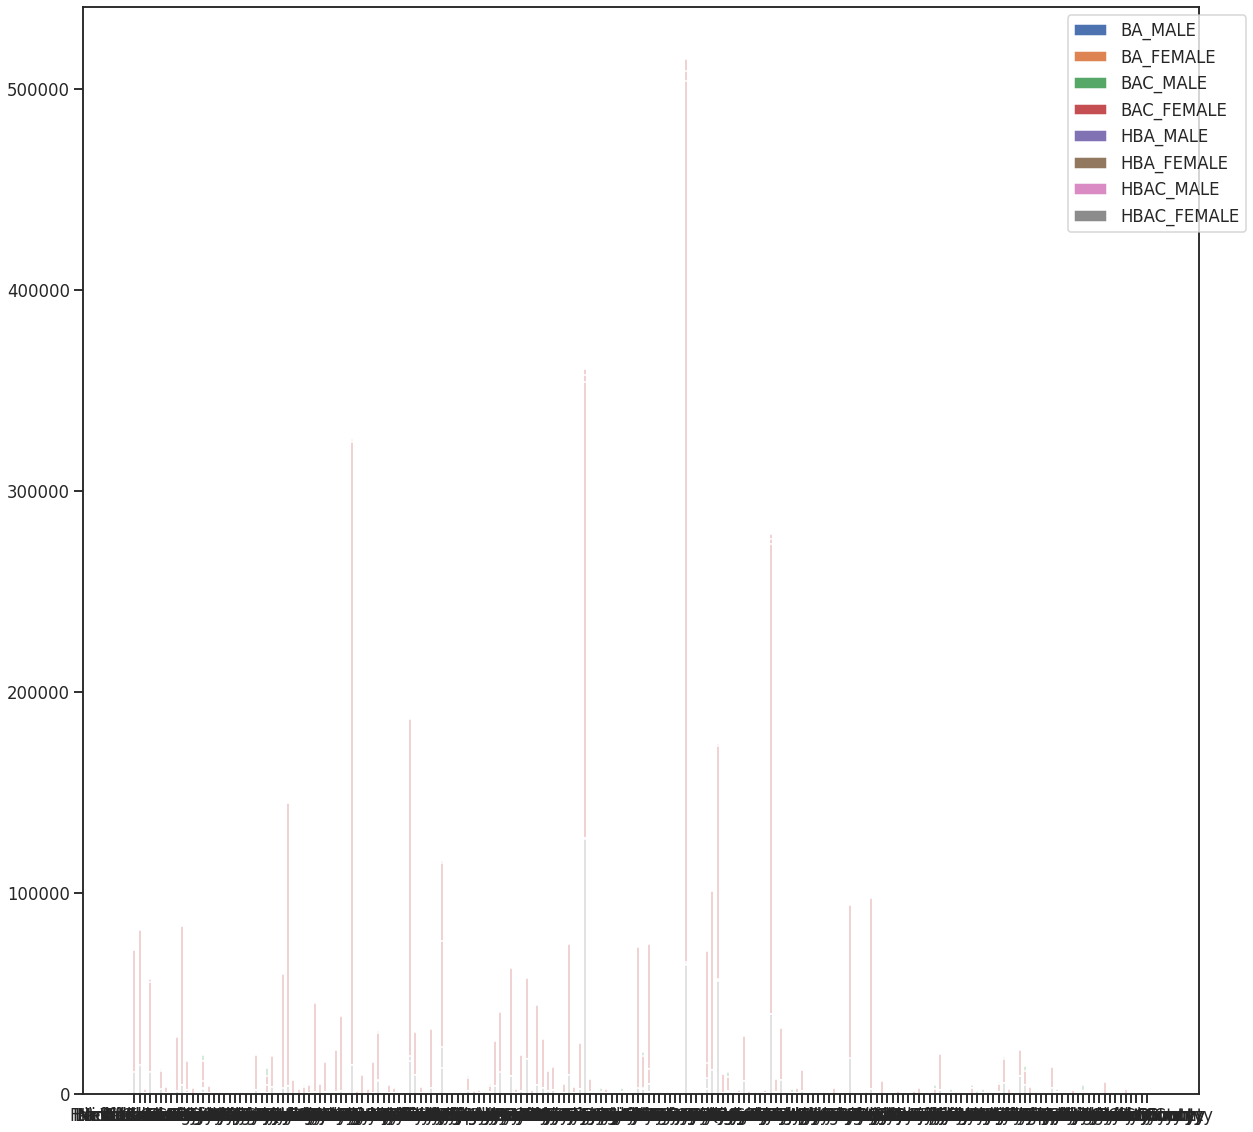

In [163]:
# afro_ethn = mass_afro.columns.values[:-1]
# fig, ax = plt.subplots(figsize=(20,20))
# for eth in afro_ethn:
#     ax.bar(mass_afro.CTYNAME, mass_afro[eth], width, label=eth)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()

* did not run as takes matplotlib too long to run
## Change demographic column into ratio per the county

In [164]:
# need to build ratios and filter out duplicate ethnicities; such as the nots and in combinations or alones
NE_dems
# make 3 df yr2017, yr2018, yr2019

demographic = NE_dems.columns.values[8:]
NE_dem_ratio = NE_dems

for dem in demographic:
    NE_dem_ratio[dem + '_ratio'] = NE_dems[dem] / NE_dems['TOT_POP'] * 100
    # print(dem + ' ratio')

In [165]:
NE_dem_ratio = remove_col(NE_dem_ratio, demographic)
NE_dem_ratio

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
70395,50,9,1,Connecticut,Fairfield County,10,0,943038,48.698144,51.301856,...,8.771863,8.578764,1.047678,1.109499,0.298079,0.263828,0.113781,0.094164,0.076773,0.055883
70414,50,9,1,Connecticut,Fairfield County,11,0,943971,48.708488,51.291512,...,8.943071,8.786817,1.085838,1.145798,0.307001,0.280199,0.118542,0.098944,0.075426,0.059536
70433,50,9,1,Connecticut,Fairfield County,12,0,943332,48.700776,51.299224,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
70623,50,9,3,Connecticut,Hartford County,10,0,893076,48.577389,51.422611,...,7.358612,7.653212,1.394618,1.551380,0.293480,0.299639,0.128544,0.121266,0.068415,0.050612
70642,50,9,3,Connecticut,Hartford County,11,0,892580,48.560017,51.439983,...,7.534003,7.856327,1.422730,1.596496,0.301149,0.312801,0.132425,0.121446,0.070806,0.051872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642694,50,50,25,Vermont,Windham County,11,0,42635,48.992612,51.007388,...,1.170400,1.008561,0.119620,0.147766,0.079747,0.068019,0.025800,0.023455,0.018764,0.004691
642713,50,50,25,Vermont,Windham County,12,0,42222,48.938942,51.061058,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
642903,50,50,27,Vermont,Windsor County,10,0,55224,48.821165,51.178835,...,0.760539,0.756917,0.070621,0.067000,0.050703,0.057946,0.027162,0.025351,0.005432,0.005432
642922,50,50,27,Vermont,Windsor County,11,0,55204,48.884139,51.115861,...,0.845953,0.780741,0.076081,0.061590,0.054344,0.059778,0.023549,0.018115,0.009057,0.003623


In [166]:
NE_dem_ratio_17 = NE_dem_ratio.loc[NE_dems.YEAR == 10]
NE_dem_ratio_18 = NE_dem_ratio.loc[NE_dems.YEAR == 11]
NE_dem_ratio_19 = NE_dem_ratio.loc[NE_dems.YEAR == 12]

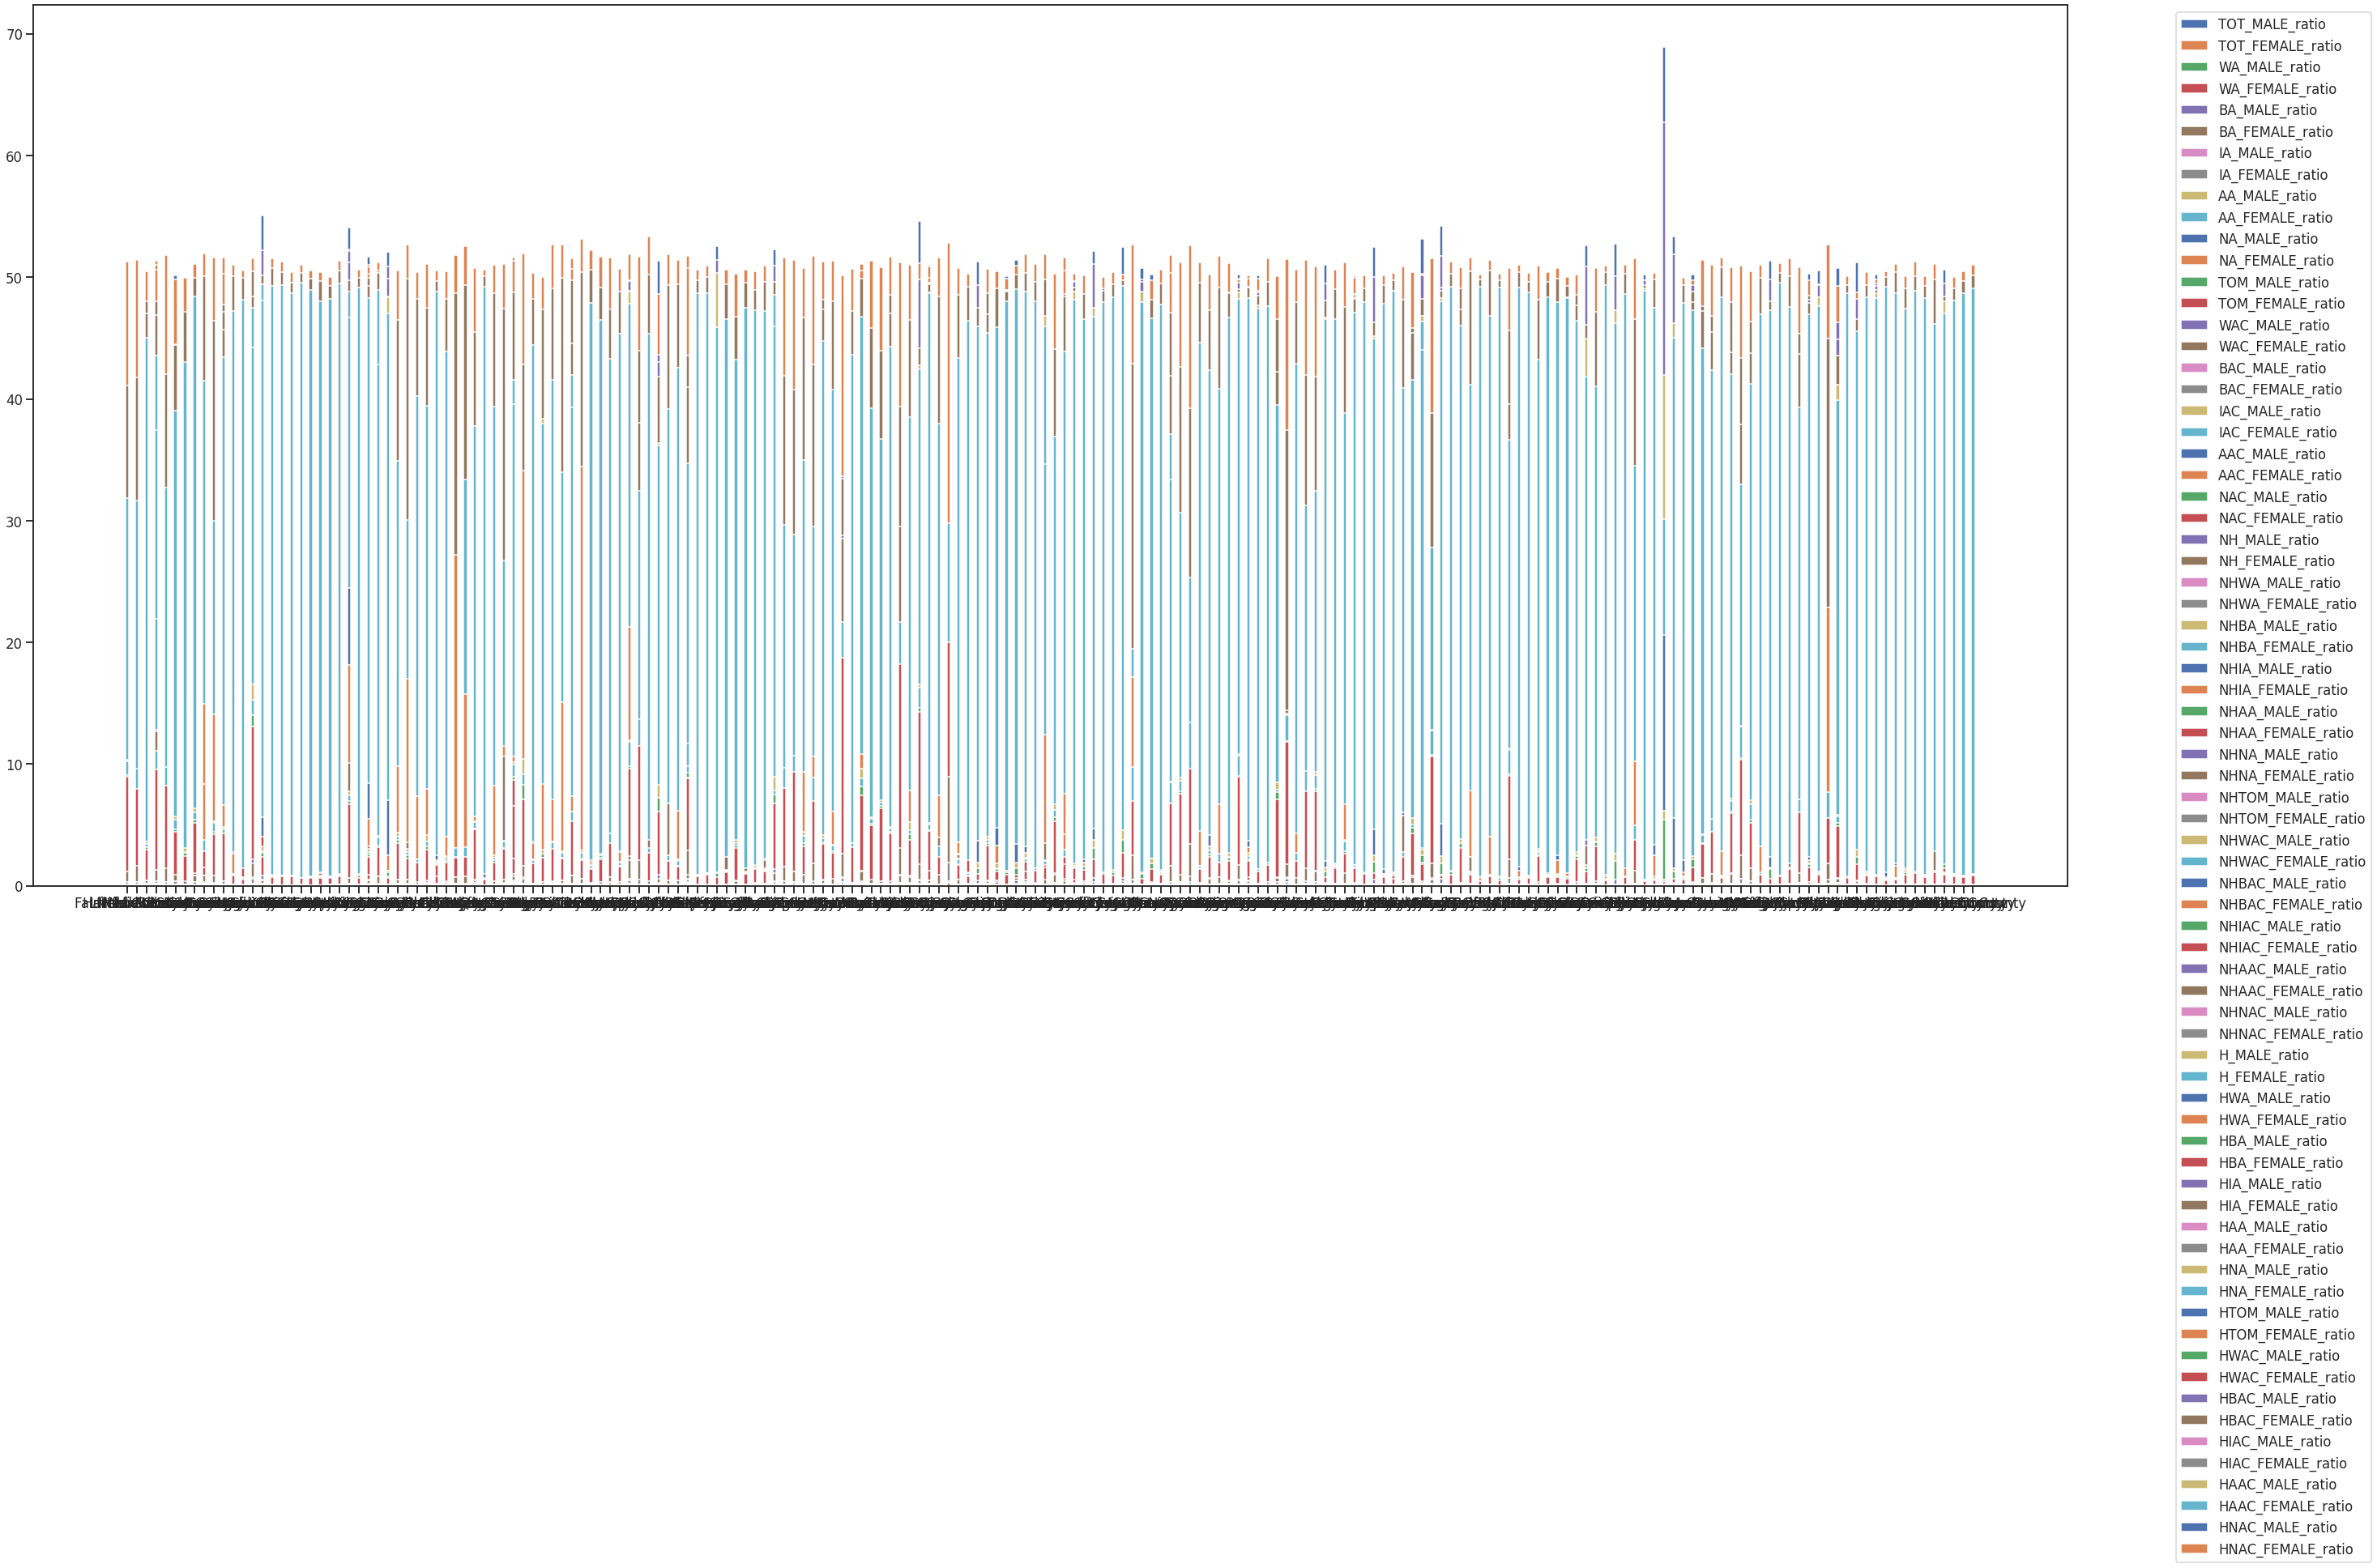

In [167]:
# make a bar chart of all demographs in county 19
# demographic_ratios = NE_dem_ratio.columns.values[8:]
#
# fig, ax = plt.subplots(figsize=(45,20))
#
# # rec1 = ax.bar(NE_dems.CTYNAME, NE_dems.loc[:,'TOT_POP'], width, label='tot pop')
# for dem in demographic_ratios:
#     ax.bar(NE_dem_ratio_19.CTYNAME, NE_dem_ratio_19[dem], width, label=dem)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()
# why are the bar charts not all equal
# maybe do them for every year

* did not run large number of county and row data would be useless to see




In [180]:
# do all counties have at least 40% for wac

NE_dem_ratio_19.columns.values[10:12]
NE_counties = NE_dem_ratio_19.CTYNAME.values

below_40_WA = []

for county in NE_counties:
   m_ratio = (NE_dem_ratio_19.loc[NE_dem_ratio_19.CTYNAME == county]['WA_MALE_ratio'])
   f_ratio = (NE_dem_ratio_19.loc[NE_dem_ratio_19.CTYNAME == county]['WA_FEMALE_ratio'])
   if((m_ratio < 40).values[0] | (f_ratio < 40).values[0]):
       print(county, m_ratio.values, f_ratio.values)
       below_40_WA.append(county)

print(len(below_40_WA))
# only 59 counties have less than 40% of white demographic

Fairfield County [38.49895901] [39.85934962]
Hartford County [36.32788319] [38.45556901]
New Haven County [37.47380835] [39.82242906]
Kent County [31.96597082 39.20296571] [33.67738652 42.09659149]
New Castle County [31.57674321] [33.03355866]
Anne Arundel County [36.69967578] [36.89959498]
Baltimore County [29.05640765] [31.13189988]
Caroline County [39.65754655] [41.33987906]
Charles County [20.6643513] [20.94611563]
Dorchester County [32.07742178] [34.64248802]
Frederick County [39.68876543] [40.98679623]
Harford County [38.77999225] [40.03664251]
Howard County [27.88940403] [28.06042556]
Kent County [31.96597082 39.20296571] [33.67738652 42.09659149]
Montgomery County [29.5184679  45.70813271 38.62440803] [30.44823963 47.24203084 40.72787229]
Prince George's County [14.11439449] [12.95452571]
St. Mary's County [39.42031539] [38.63007665]
Talbot County [39.47715231] [43.82614776]
Wicomico County [31.43838856] [34.8097173]
Baltimore city [15.73826012] [16.04761664]
Hampden County [39

# combine the data sets
make the foreign key

In [181]:
print(NE_aqi_2019.columns)
print(NE_dem_ratio_19)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
        SUMLEV  STATE  COUNTY       STNAME            CTYNAME  YEAR  AGEGRP  \
70433       50      9       1  Connecticut   Fairfield County    12       0   
70661       50      9       3  Connecticut    Hartford County    12       0   
70889       50      9       5  Connecticut  Litchfield County    12       0   
71117       50      9       7  Connecticut   Middlesex County    12       0   
71345       50      9       9  Connecticut   New Haven County    12       0   
...        ...    ...     ...          ...                ...   ...     ...   
642029      50     50      19      Vermont     Orleans County    12       0   
642257      50     50      21      Vermont     Rutland County    12       0   
642485      50     50      23      Vermont  Washington County    12       0   
642713      5

In [182]:
# add GeoFIPS for mass-dem_ratio_19

state_dem = NE_dem_ratio_19.STATE.astype(str).values
county_dem = NE_dem_ratio_19.COUNTY.astype(str).values
geofips_dem = []
for stateID, countyID in zip(state_dem, county_dem):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_dem.append(id)

NE_dem_ratio_19['GeoFIPS'] = geofips_dem
display(NE_dem_ratio_19)

<ipython-input-182-35755d323181>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NE_dem_ratio_19['GeoFIPS'] = geofips_dem


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,...,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio,GeoFIPS
70433,50,9,1,Connecticut,Fairfield County,12,0,943332,48.700776,51.299224,...,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682,09001
70661,50,9,3,Connecticut,Hartford County,12,0,891720,48.580720,51.419280,...,7.970103,1.458642,1.633585,0.303234,0.315458,0.137711,0.124815,0.069304,0.052819,09003
70889,50,9,5,Connecticut,Litchfield County,12,0,180333,49.515618,50.484382,...,3.005551,0.454714,0.417561,0.167468,0.144732,0.053789,0.051017,0.030499,0.022736,09005
71117,50,9,7,Connecticut,Middlesex County,12,0,162436,48.671477,51.328523,...,2.829422,0.419858,0.471570,0.088035,0.112044,0.056022,0.052944,0.029550,0.032013,09007
71345,50,9,9,Connecticut,New Haven County,12,0,854757,48.211246,51.788754,...,8.240939,1.302943,1.452343,0.285812,0.297628,0.097104,0.095115,0.048786,0.047733,09009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642029,50,50,19,Vermont,Orleans County,12,0,27037,50.098014,49.901986,...,0.702741,0.073973,0.070274,0.059178,0.051781,0.022192,0.018493,0.011096,0.007397,50019
642257,50,50,21,Vermont,Rutland County,12,0,58191,49.519685,50.480315,...,0.704576,0.089361,0.044680,0.054991,0.049836,0.024059,0.015466,0.006874,0.005155,50021
642485,50,50,23,Vermont,Washington County,12,0,58409,49.728638,50.271362,...,0.910819,0.089027,0.051362,0.068483,0.053074,0.018833,0.020545,0.006848,0.000000,50023
642713,50,50,25,Vermont,Windham County,12,0,42222,48.938942,51.061058,...,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737,50025


In [183]:
# add GeoFIPS for mass_aqi_2019
state_aqi = NE_aqi_2019['State Code'].astype(str).values
county_aqi = NE_aqi_2019['County Code'].astype(str).values

geofips_aqi = []
for stateID, countyID in zip(state_aqi, county_aqi):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_aqi.append(id)

NE_aqi_2019['GeoFIPS'] = geofips_aqi
display(NE_aqi_2019)

<ipython-input-183-7ed01fcc82c8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NE_aqi_2019['GeoFIPS'] = geofips_aqi


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,GeoFIPS
42469,Connecticut,Fairfield,9,1,2019-01-01,20,Good,PM2.5,09-001-1123,3,09001
42470,Connecticut,Fairfield,9,1,2019-01-02,31,Good,PM2.5,09-001-1123,3,09001
42471,Connecticut,Fairfield,9,1,2019-01-03,38,Good,PM2.5,09-001-1123,3,09001
42472,Connecticut,Fairfield,9,1,2019-01-04,55,Moderate,PM2.5,09-001-0010,3,09001
42473,Connecticut,Fairfield,9,1,2019-01-05,52,Moderate,PM2.5,09-001-1123,3,09001
...,...,...,...,...,...,...,...,...,...,...,...
301885,Vermont,Windham,50,25,2019-12-14,0,Good,PM2.5,50-025-9000,1,50025
301886,Vermont,Windham,50,25,2019-12-17,3,Good,PM2.5,50-025-9000,1,50025
301887,Vermont,Windham,50,25,2019-12-20,5,Good,PM2.5,50-025-9000,1,50025
301888,Vermont,Windham,50,25,2019-12-23,18,Good,PM2.5,50-025-9000,1,50025


In [184]:
# combine them

NE_aqi_dem_19 = pd.merge(NE_aqi_2019, NE_dem_ratio_19, on='GeoFIPS')

display(NE_aqi_dem_19)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
0,Connecticut,Fairfield,9,1,2019-01-01,20,Good,PM2.5,09-001-1123,3,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,Connecticut,Fairfield,9,1,2019-01-02,31,Good,PM2.5,09-001-1123,3,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
2,Connecticut,Fairfield,9,1,2019-01-03,38,Good,PM2.5,09-001-1123,3,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
3,Connecticut,Fairfield,9,1,2019-01-04,55,Moderate,PM2.5,09-001-0010,3,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
4,Connecticut,Fairfield,9,1,2019-01-05,52,Moderate,PM2.5,09-001-1123,3,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51797,Vermont,Windham,50,25,2019-12-14,0,Good,PM2.5,50-025-9000,1,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
51798,Vermont,Windham,50,25,2019-12-17,3,Good,PM2.5,50-025-9000,1,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
51799,Vermont,Windham,50,25,2019-12-20,5,Good,PM2.5,50-025-9000,1,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
51800,Vermont,Windham,50,25,2019-12-23,18,Good,PM2.5,50-025-9000,1,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737


In [188]:
# drop redundant columns
# rename more descriptive names
print(NE_aqi_dem_19.columns)
col_to_drop = ['SUMLEV', 'county Name', 'State Code', 'County Code', 'STATE', 'COUNTY', 'STNAME', 'YEAR']
NE_19_df = remove_col(NE_aqi_dem_19, col_to_drop)
display(NE_19_df)
print(NE_19_df.columns)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting', 'GeoFIPS', 'SUMLEV', 'STATE', 'COUNTY',
       'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE_ratio',
       'TOT_FEMALE_ratio', 'WA_MALE_ratio', 'WA_FEMALE_ratio', 'BA_MALE_ratio',
       'BA_FEMALE_ratio', 'IA_MALE_ratio', 'IA_FEMALE_ratio', 'AA_MALE_ratio',
       'AA_FEMALE_ratio', 'NA_MALE_ratio', 'NA_FEMALE_ratio', 'TOM_MALE_ratio',
       'TOM_FEMALE_ratio', 'WAC_MALE_ratio', 'WAC_FEMALE_ratio',
       'BAC_MALE_ratio', 'BAC_FEMALE_ratio', 'IAC_MALE_ratio',
       'IAC_FEMALE_ratio', 'AAC_MALE_ratio', 'AAC_FEMALE_ratio',
       'NAC_MALE_ratio', 'NAC_FEMALE_ratio', 'NH_MALE_ratio',
       'NH_FEMALE_ratio', 'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio',
       'NHBA_MALE_ratio', 'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio',
       'NHIA_FEMALE_ratio', 'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio',
       'NHNA_MALE

,State Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,GeoFIPS,CTYNAME,AGEGRP,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
0,Connecticut,2019-01-01,20,Good,PM2.5,09-001-1123,3,09001,Fairfield County,0,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,Connecticut,2019-01-02,31,Good,PM2.5,09-001-1123,3,09001,Fairfield County,0,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
2,Connecticut,2019-01-03,38,Good,PM2.5,09-001-1123,3,09001,Fairfield County,0,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
3,Connecticut,2019-01-04,55,Moderate,PM2.5,09-001-0010,3,09001,Fairfield County,0,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
4,Connecticut,2019-01-05,52,Moderate,PM2.5,09-001-1123,3,09001,Fairfield County,0,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51797,Vermont,2019-12-14,0,Good,PM2.5,50-025-9000,1,50025,Windham County,0,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
51798,Vermont,2019-12-17,3,Good,PM2.5,50-025-9000,1,50025,Windham County,0,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
51799,Vermont,2019-12-20,5,Good,PM2.5,50-025-9000,1,50025,Windham County,0,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737
51800,Vermont,2019-12-23,18,Good,PM2.5,50-025-9000,1,50025,Windham County,0,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737


# Explore dataset with scatterplot, distro, etc..

In [189]:
#maybe make a mean aqi per a state
# our target is aqi
# we shhould group our data by counties then run aqis on them?

df = NE_19_df.groupby('CTYNAME').mean()
display(df)
df.shape

,AQI,Number of Sites Reporting,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,WA_MALE_ratio,WA_FEMALE_ratio,BA_MALE_ratio,BA_FEMALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
CTYNAME,,,,,,,,,,,,,,,,,,,,,
Adams County,42.895890,1.931507,0.0,1.030090e+05,49.207351,50.792649,46.734751,48.375385,1.107670,0.916425,...,3.497753,3.089050,0.269879,0.248522,0.165034,0.143677,0.035919,0.049510,0.025241,0.012620
Albany County,38.002740,2.000000,0.0,3.055060e+05,48.384647,51.615353,36.751815,39.036549,6.687594,7.418840,...,2.274587,2.361983,0.784927,0.900146,0.131912,0.128966,0.050081,0.053027,0.021931,0.021604
Allegany County,12.879452,1.994521,0.0,7.041600e+04,52.107476,47.892524,43.978641,44.271188,6.445978,1.816349,...,1.089241,0.593615,0.127812,0.095149,0.055385,0.041184,0.018462,0.012781,0.009941,0.007101
Allegheny County,58.501370,10.438356,0.0,1.216045e+06,48.389245,51.610755,38.831293,41.031623,6.217615,7.218894,...,0.978829,0.932531,0.180585,0.202624,0.046462,0.049669,0.027548,0.027137,0.008141,0.010855
Androscoggin County,30.504155,1.584488,0.0,1.082770e+05,48.978084,51.021916,44.801758,46.919475,2.307969,2.191601,...,0.853367,0.834896,0.121910,0.120062,0.063725,0.045254,0.052643,0.026783,0.007388,0.012930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Westmoreland County,38.847458,1.000000,0.0,3.488990e+05,48.947976,51.052024,46.208788,48.470188,1.390087,1.208946,...,0.584983,0.526227,0.097449,0.082259,0.033534,0.028948,0.012898,0.011751,0.003439,0.004299
Windham County,30.948276,1.000000,0.0,1.000703e+05,49.475170,50.524830,45.676219,46.895850,1.570313,1.272369,...,4.475400,4.222711,0.680281,0.696617,0.253636,0.254036,0.091807,0.064170,0.038530,0.028965
Worcester County,40.482192,2.980822,0.0,8.306220e+05,49.313647,50.686353,42.177067,43.507275,3.104421,2.984992,...,5.248236,5.273999,0.839130,0.823961,0.199128,0.197804,0.070068,0.071633,0.032265,0.032024


(131, 76)

# Explore pop demographic and aqi demographics



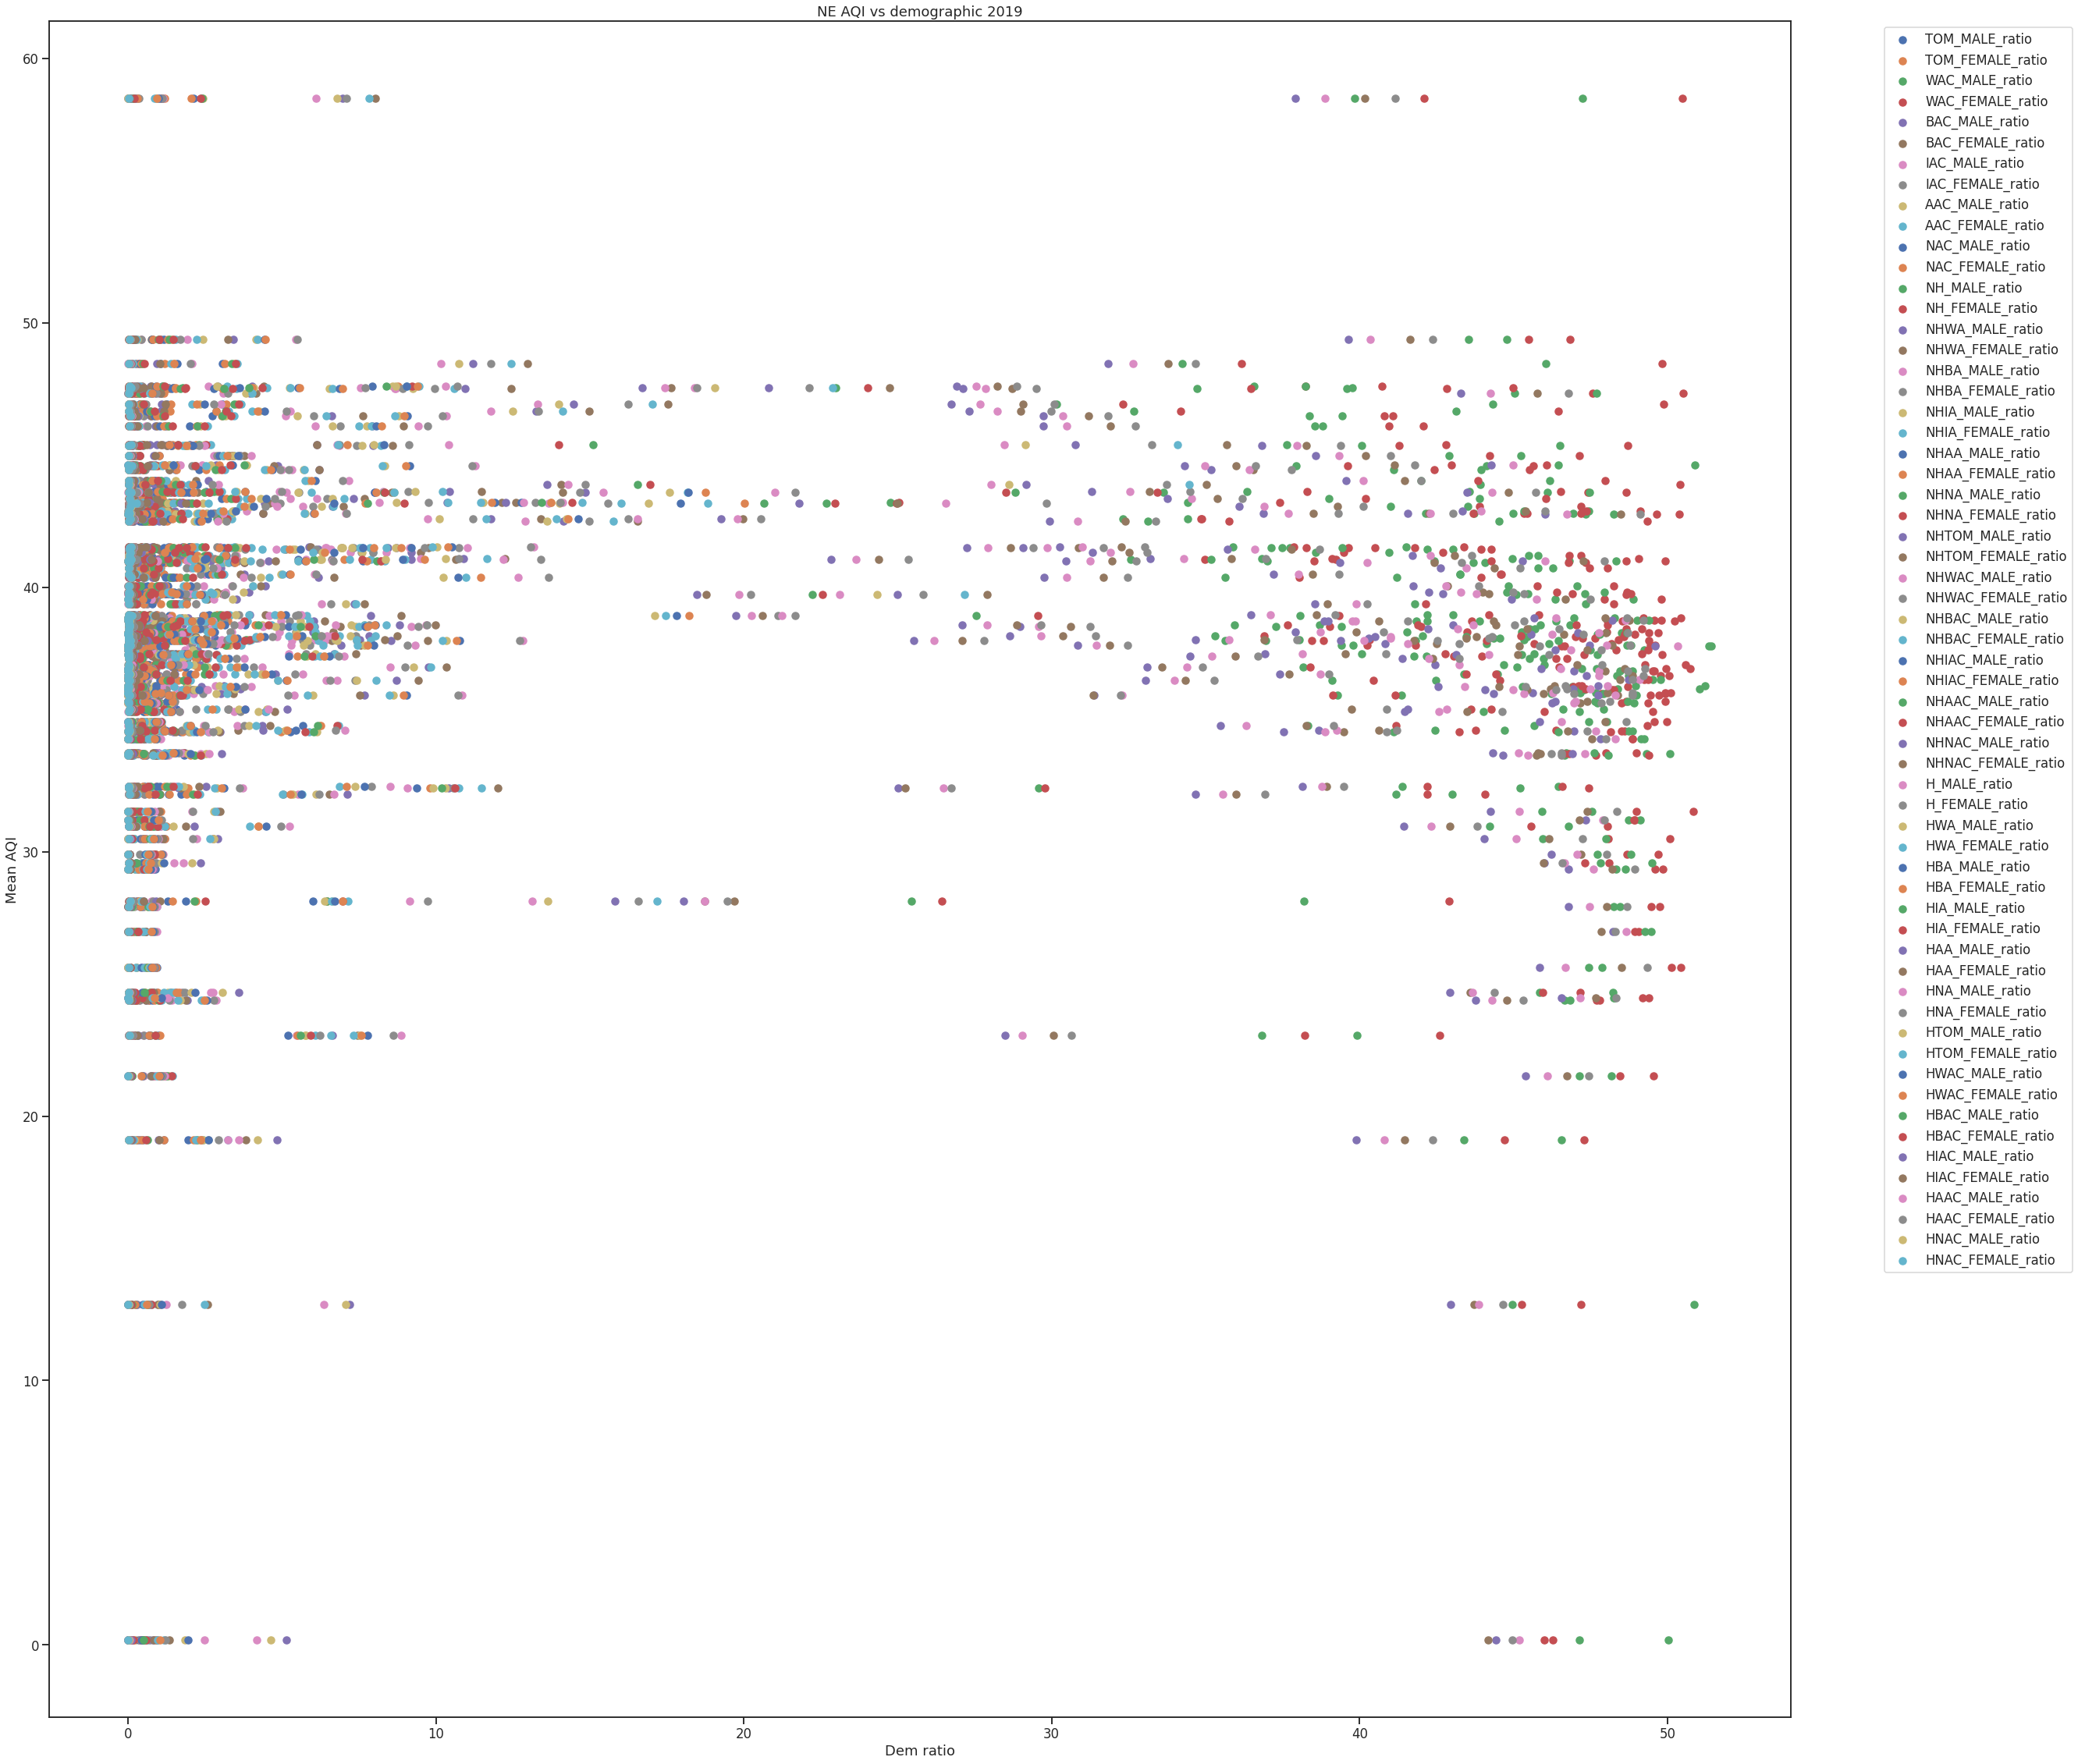

In [190]:
demographic = df.columns.values[16:]
demographic

fig, ax = plt.subplots(figsize=(40,40))

plt.title('NE AQI vs demographic 2019')
plt.xlabel('Dem ratio')
plt.ylabel('Mean AQI')
for dem in demographic:
    ax.scatter(df[dem], df['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

# each horizontal line is one county and it shows many different demographics

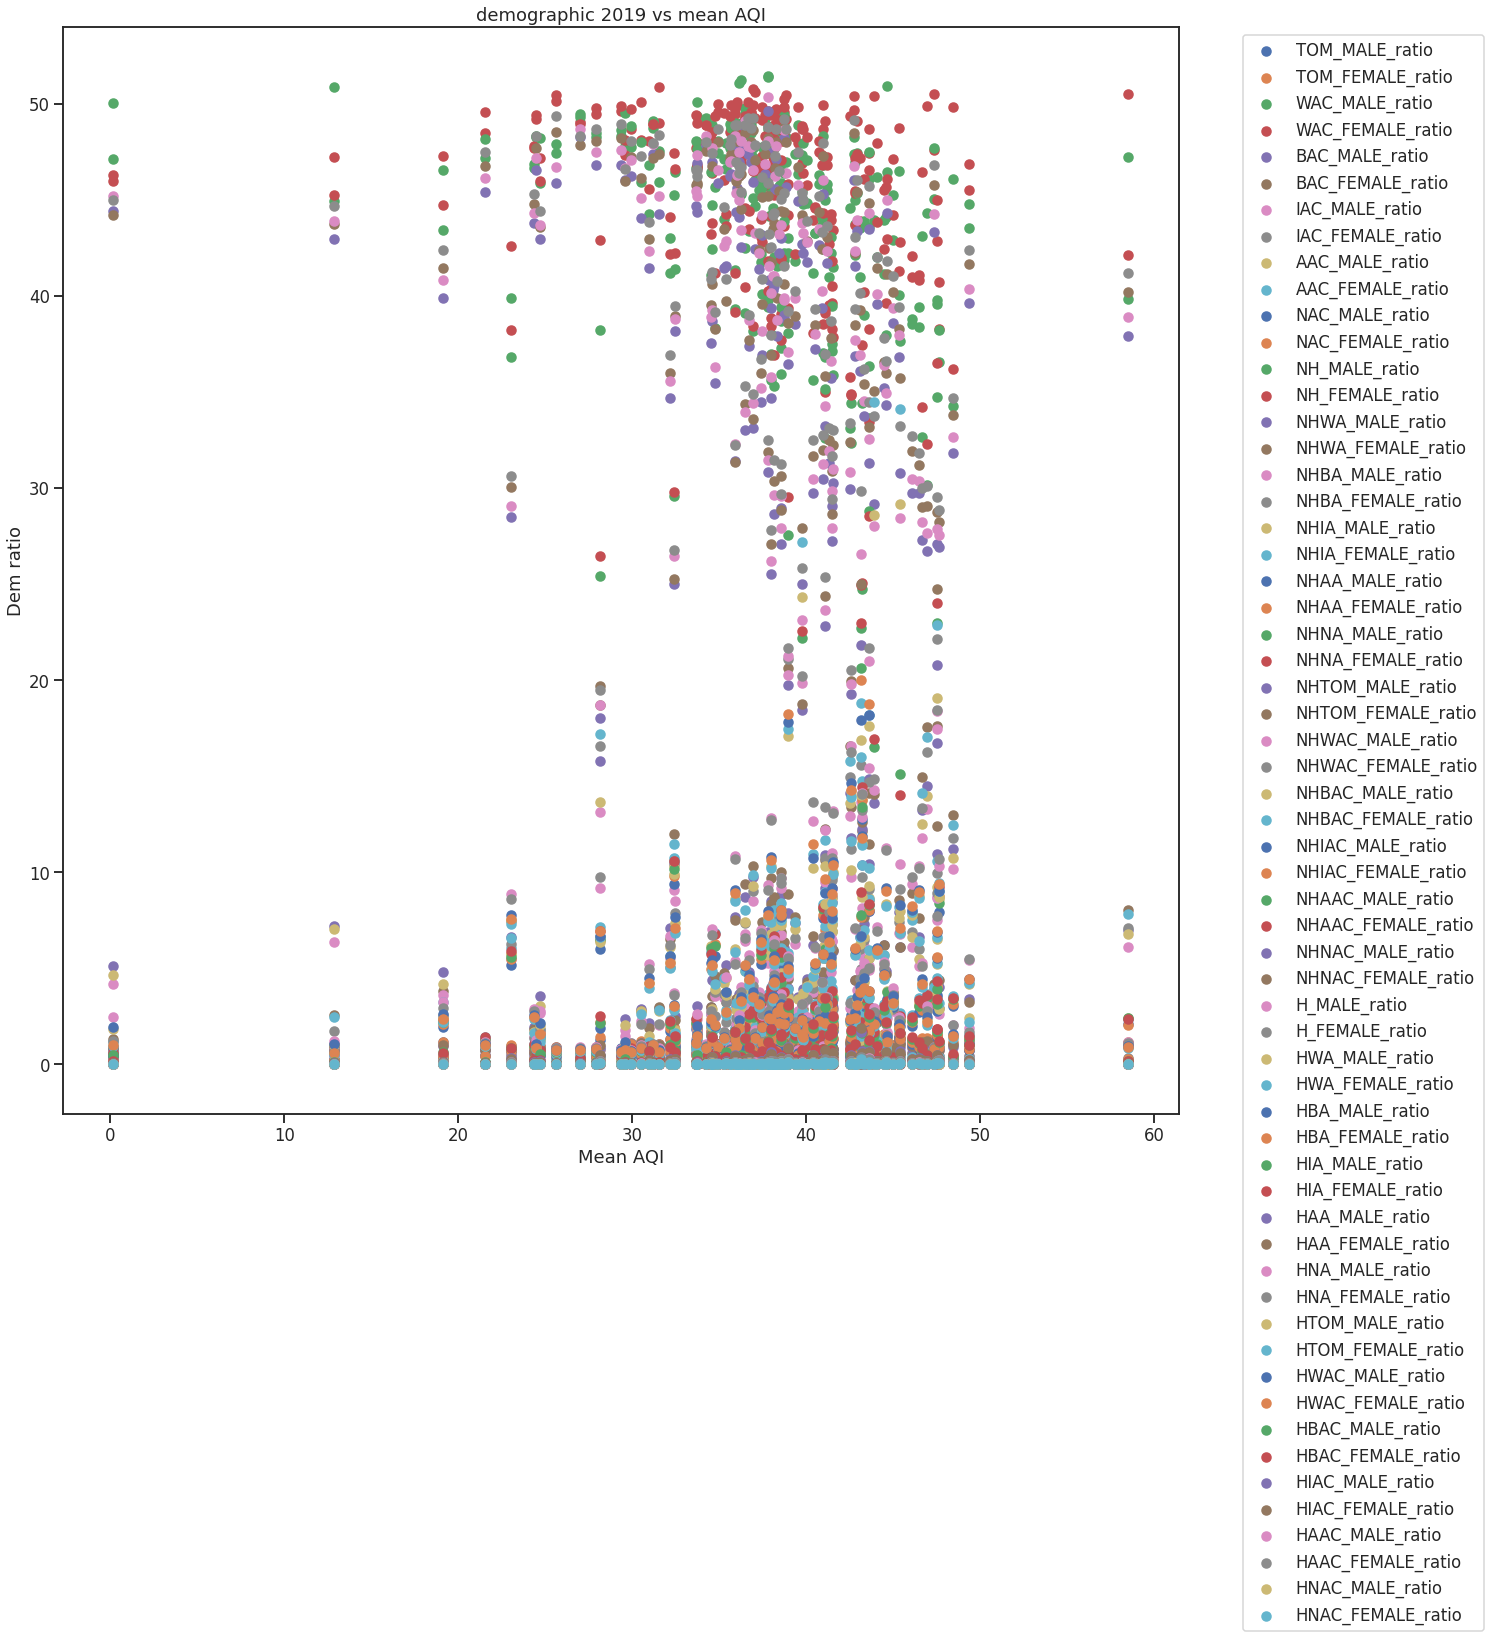

In [191]:
# flip the axis comparison

fig, ax = plt.subplots(figsize=(20,20))

plt.title('demographic 2019 vs mean AQI')
plt.xlabel('Mean AQI')
plt.ylabel('Dem ratio')
for dem in demographic:
    ax.scatter(df['AQI'], df[dem], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [ ]:
demographic_alone_combo = df.columns.values[16:28]
demographic_alone_combo

fig, ax = plt.subplots(figsize=(20,20))

plt.title('demographic 2019 vs mean AQI')
plt.xlabel('Mean AQI')
plt.ylabel('Dem ratio')
for dem in demographic_alone_combo:
    ax.scatter(df['AQI'], df[dem], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()
# what if i did a scatterplot for each race

In [ ]:
for dem in demographic:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(' mean AQI vs ' + dem)
    plt.xlabel('Dem ratio')
    plt.ylabel('Mean AQI')
    ax.scatter(df[dem], df['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

/home/wkc/.local/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

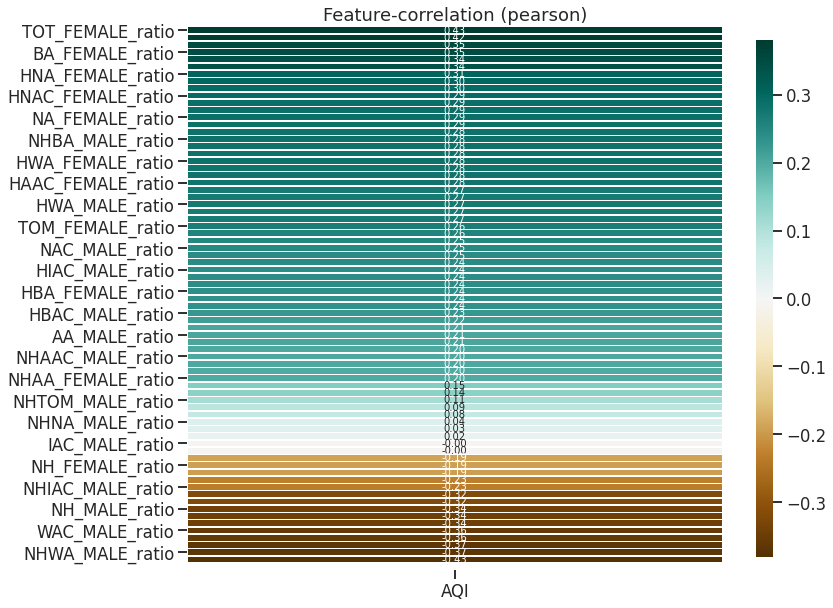

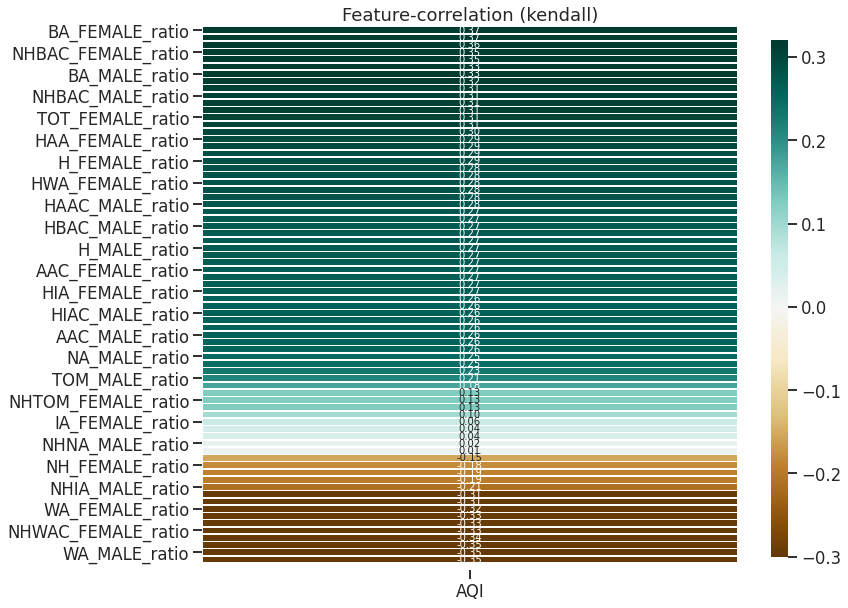

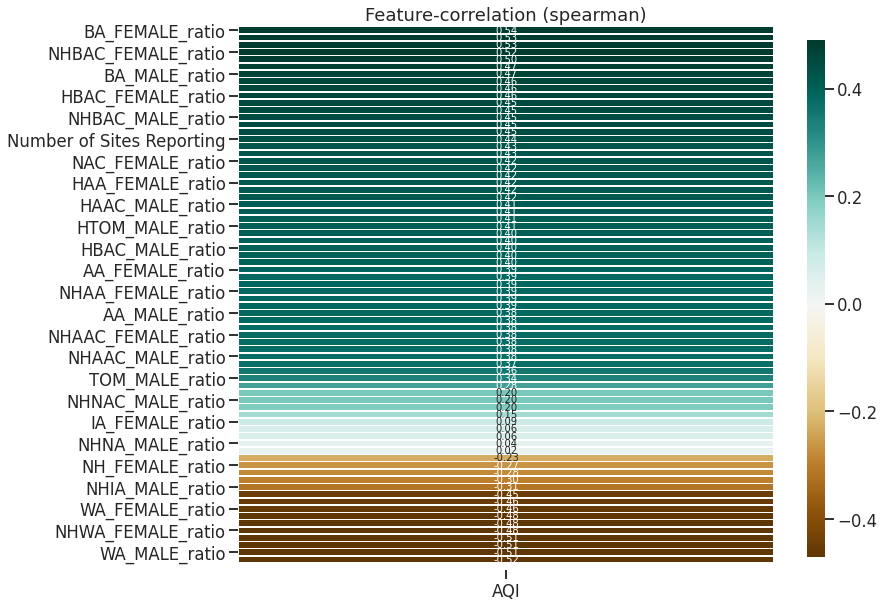

In [192]:
klib.corr_plot(df, target='AQI', method='pearson')
klib.corr_plot(df, target='AQI', method='kendall')
klib.corr_plot(df, target='AQI', method='spearman')

* From spearman it is shown that black females have a .54 correlation with AQI positive
* whereas white males show negative AQI correlation; meaning higher white males; have cleaner air -.52
* these strenghts are moderate but not particularly strong